In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt

import scipy
from scipy.stats import norm, gamma, lognorm, genextreme, genextreme as gev
from scipy.optimize import minimize
from xclim.indices.stats import fit

import random
import sys; sys.path.append('scripts/')
from nonstationary_fitting import *

In [2]:
era5_gmst = pd.read_csv('data/era5_global_mean_surf_temp.csv',index_col=0)
era5_gmst['gmst'] = era5_gmst['gmst'].rolling(5).mean()
era5_gmst_1979_2022 = era5_gmst[era5_gmst['time']>1978]
era5_gmst_1979_2022 = era5_gmst_1979_2022['gmst']
era5_gmst_1979_2022.index = range(1979,2023)

era5_gmst_1979_2022 = era5_gmst_1979_2022 - 273.15
era5_gmst_1979_2022 = era5_gmst_1979_2022 - era5_gmst_1979_2022[era5_gmst_1979_2022.index<2011].mean()

era5_gmst_1979_2021 = era5_gmst_1979_2022[era5_gmst_1979_2022.index<2022]
era5_gmst_1979_2021 = era5_gmst_1979_2021 - 273.15
era5_gmst_1979_2021 = era5_gmst_1979_2021 - era5_gmst_1979_2021[era5_gmst_1979_2021.index<2011].mean()

In [3]:
YRB_SAT_1979_2022 = pd.read_csv('data/YRB_averaged_SAT_1979_2022.csv',index_col=0)
YRB_SAT_1979_2022['t2m'] = YRB_SAT_1979_2022['t2m'] - 273.15
YRB_SAT_1979_2021 = YRB_SAT_1979_2022[:-1]
YRB_HWD_1979_2022 = pd.read_csv('data/YRB_averaged_HWD_1979_2022.csv',index_col=0)
YRB_HWD_1979_2022['t2m'] = YRB_HWD_1979_2022['t2m']
YRB_HWD_1979_2021 = YRB_HWD_1979_2022[:-1]

In [4]:
YRB_HW_data_1979_2021 = pd.DataFrame({'SAT':YRB_SAT_1979_2021['t2m'].tolist(),'HWD':YRB_HWD_1979_2021['t2m'].tolist(),'GMST':era5_gmst_1979_2021.tolist()})
YRB_HW_data_1979_2022 = pd.DataFrame({'SAT':YRB_SAT_1979_2022['t2m'].tolist(),'HWD':YRB_HWD_1979_2022['t2m'].tolist(),'GMST':era5_gmst_1979_2022.tolist()})

In [5]:
gev.fit(YRB_SAT_1979_2021['t2m'].tolist())

(0.21877450883753807, 23.15137739949357, 0.44306322049553826)

In [6]:
# calculate nonstationary fitting parameters
# sigma and shape are the constant parameters
# mu and alpha is two new parameters to generate the time-varing location parameter, i.e., loc = mu + alpha * covariate
params_1979_2021_mdl = ns_fit(dist=gev,fittype="shift",data=YRB_HW_data_1979_2021,cov_name='GMST',var_name='SAT')
params_1979_2021 = params_1979_2021_mdl['results']
print(params_1979_2021)

 final_simplex: (array([[23.05798513,  0.34040654,  1.23575688,  0.21566048],
       [23.05796767,  0.34040927,  1.23570215,  0.21567708],
       [23.05798057,  0.34043141,  1.23582691,  0.21574382],
       [23.05795708,  0.34044466,  1.2356929 ,  0.21569836],
       [23.05800688,  0.34042347,  1.23572999,  0.21573716]]), array([16.07126921, 16.0712693 , 16.07126934, 16.07126959, 16.07126963]))
           fun: 16.071269205456424
       message: 'Optimization terminated successfully.'
          nfev: 237
           nit: 141
          pars: {'mu': 23.057985132706797, 'sigma': 0.3404065388479822, 'alpha': 1.2357568769917124, 'shape': 0.21566047878525715}
        status: 0
       success: True
             x: array([23.05798513,  0.34040654,  1.23575688,  0.21566048])


In [7]:
# including the 2022 event
params_1979_2022_mdl = ns_fit(dist=gev,fittype="shift",data=YRB_HW_data_1979_2022,cov_name='GMST',var_name='SAT')
params_1979_2022 = params_1979_2022_mdl['results']
print(params_1979_2022)

 final_simplex: (array([[23.05081844,  0.35450154,  1.35334223,  0.16998365],
       [23.05084818,  0.35449069,  1.35331706,  0.16995589],
       [23.05082971,  0.35450735,  1.35336115,  0.1700101 ],
       [23.05081186,  0.35449833,  1.35344014,  0.16997228],
       [23.05082233,  0.3545091 ,  1.35332034,  0.16995477]]), array([19.44466393, 19.44466396, 19.44466397, 19.44466403, 19.44466404]))
           fun: 19.44466393203229
       message: 'Optimization terminated successfully.'
          nfev: 245
           nit: 144
          pars: {'mu': 23.05081844330312, 'sigma': 0.35450153881622903, 'alpha': 1.3533422293793305, 'shape': 0.16998365257869602}
        status: 0
       success: True
             x: array([23.05081844,  0.35450154,  1.35334223,  0.16998365])


# plot Figure S2 for HWD

In [8]:
gev.fit(YRB_HWD_1979_2021['t2m'].tolist())

(-0.06999494283626981, 8.386236201236471, 4.094973809883337)

In [9]:
# calculate nonstationary fitting parameters
# sigma and shape are the constant parameters
# mu and alpha is two new parameters to generate the time-varing location parameter, i.e., loc = mu + alpha * covariate
params_1979_2021_mdl = ns_fit(dist=gev,fittype="shift",data=YRB_HW_data_1979_2021,cov_name='GMST',var_name='HWD')
params_1979_2021 = params_1979_2021_mdl['results']
print(params_1979_2021)

 final_simplex: (array([[ 7.84656638,  3.2010728 , 14.49398373,  0.07247644],
       [ 7.84655712,  3.20107189, 14.4940683 ,  0.07247634],
       [ 7.84656108,  3.20107114, 14.49402177,  0.07247855],
       [ 7.84654452,  3.20105755, 14.49401915,  0.07247446],
       [ 7.8465708 ,  3.20106061, 14.49403154,  0.07247653]]), array([115.93016633, 115.93016633, 115.93016633, 115.93016633,
       115.93016633]))
           fun: 115.93016633027659
       message: 'Optimization terminated successfully.'
          nfev: 288
           nit: 162
          pars: {'mu': 7.846566381065604, 'sigma': 3.201072795592532, 'alpha': 14.493983734879135, 'shape': 0.0724764427472755}
        status: 0
       success: True
             x: array([ 7.84656638,  3.2010728 , 14.49398373,  0.07247644])


In [10]:
# including the 2022 event
params_1979_2022_mdl = ns_fit(dist=gev,fittype="shift",data=YRB_HW_data_1979_2022,cov_name='GMST',var_name='HWD')
params_1979_2022 = params_1979_2022_mdl['results']
print(params_1979_2022)

 final_simplex: (array([[ 7.84695447,  3.38986129, 14.46298954, -0.03531049],
       [ 7.84696837,  3.38985929, 14.46294028, -0.03530994],
       [ 7.84696017,  3.38985615, 14.46304184, -0.0353086 ],
       [ 7.84697099,  3.38986723, 14.46295002, -0.03530741],
       [ 7.84694754,  3.38984539, 14.46297245, -0.03531079]]), array([123.75553, 123.75553, 123.75553, 123.75553, 123.75553]))
           fun: 123.75552999767783
       message: 'Optimization terminated successfully.'
          nfev: 341
           nit: 201
          pars: {'mu': 7.846954468543578, 'sigma': 3.3898612875256986, 'alpha': 14.462989544715889, 'shape': -0.03531049033411009}
        status: 0
       success: True
             x: array([ 7.84695447,  3.38986129, 14.46298954, -0.03531049])


In [11]:
x_ci = np.array([10,20,50,100,200,500,1000,2000,5000,10000])
rc_1 = return_ci(params_1979_2021_mdl, era5_gmst_1979_2022.tolist()[-1], lower = False, ci_nsamp = 100, seed = 1)
rc_2 = return_ci(params_1979_2022_mdl, era5_gmst_1979_2022.tolist()[-1], lower = False, ci_nsamp = 100, seed = 1)

The 2022 YRB HWD is 37.38
The return period (not include 2022 event in the fitting) of the 2022 event is 8003.27
The return period (include 2022 event in the fitting) of the 2022 event is 282.22


/var/folders/gl/305lw9j910n_yd3gdvyjpyz80000gn/T/ipykernel_74231/3824424277.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


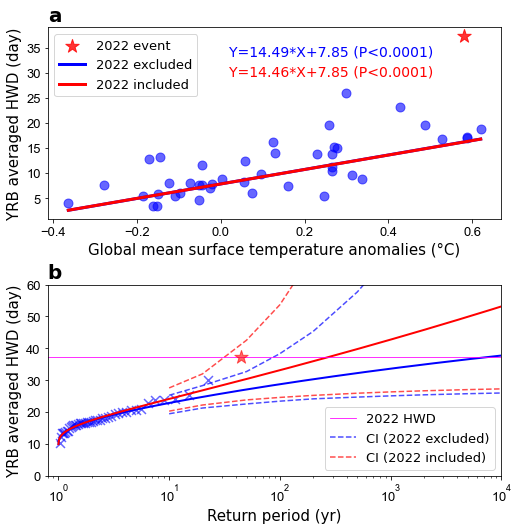

In [12]:
axes_locs = [
    [0.05,0.56,0.9,0.38],
    [0.05,0.05,0.9,0.38],
]

fig = plt.figure(figsize = (7,7))
ax1 = fig.add_axes(axes_locs[0])
ax1.scatter(era5_gmst_1979_2021.values,YRB_HWD_1979_2021['t2m'],marker='o',color='blue',alpha=0.6,s=80)
x1 = [era5_gmst_1979_2021.min(),era5_gmst_1979_2021.max()]
mu1 = params_1979_2021['pars']['mu']
alpha1 = params_1979_2021['pars']['alpha']
y1 = [mu1+x1[0]*alpha1,mu1+x1[1]*alpha1]
l1 = ax1.plot(x1,y1,c='blue',linewidth=3)
s = 'Y=' + str(round(alpha1,2)) + '*X+' + str(round(mu1,2)) + ' (P<0.0001)'
ax1.text(x = 0.4, y = 0.85, s = s, fontsize=14, color = 'b',transform=ax1.transAxes)

star = ax1.scatter(era5_gmst_1979_2022.values[-1],YRB_HWD_1979_2022['t2m'][2022],marker='*',color='red',alpha=0.8,s=200)
x2 = [era5_gmst_1979_2022.min(),era5_gmst_1979_2022.max()]
mu2 = params_1979_2022['pars']['mu']
alpha2 = params_1979_2022['pars']['alpha']
y2 = [mu2+x2[0]*alpha2,mu2+x2[1]*alpha2]
l2 = ax1.plot(x2,y2,c='red',linewidth=3)
s = 'Y=' + str(round(alpha2,2)) + '*X+' + str(round(mu2,2)) + ' (P<0.0001)'
ax1.text(x = 0.4, y = 0.75, s = s, fontsize=14, color = 'r',transform=ax1.transAxes)

ax1.set_ylabel('YRB averaged HWD (day)',fontdict={'fontsize':15})
ax1.set_xlabel('Global mean surface temperature anomalies (°C)',fontdict={'fontsize':15})
# ax1.set_ylim([21.5,25.3])
ax1.legend(
    [star,l1[0],l2[0]], ['2022 event','2022 excluded','2022 included'],fancybox = True,frameon=True, loc='upper left', #bbox_to_anchor=[0.65,0.35], 
    ncol=1,fontsize=13)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(13)

############# ax2
ax2 = fig.add_axes(axes_locs[1])
# z for return period
z1 = []
for i in range(len(YRB_HWD_1979_2022['t2m'].tolist())):
    z1.append(return_period(mdl = params_1979_2021_mdl,event_value = YRB_HWD_1979_2022['t2m'].tolist()[i],covariate=era5_gmst_1979_2022.tolist()[-1]))
z2 = []
for i in range(len(YRB_HWD_1979_2022['t2m'].tolist())):
    z2.append(return_period(mdl = params_1979_2022_mdl,event_value = YRB_HWD_1979_2022['t2m'].tolist()[i],covariate=era5_gmst_1979_2022.tolist()[-1]))

y_fit_1 = np.linspace(10, 60, 1000)
x_fit_1 = return_period(mdl = params_1979_2021_mdl,event_value = y_fit_1,covariate=era5_gmst_1979_2022.tolist()[-1])
ax2.plot(x_fit_1,y_fit_1,'-',color='blue',linewidth=2)

y_fit_2 = np.linspace(10, 60, 1000)
x_fit_2 = return_period(mdl = params_1979_2022_mdl,event_value = y_fit_2,covariate=era5_gmst_1979_2022.tolist()[-1])
ax2.plot(x_fit_2,y_fit_2,'-',color='red',linewidth=2)

l1 = ax2.plot(x_ci, rc_1.transpose(), color = "blue", ls = "--", alpha = 0.7)
l2 = ax2.plot(x_ci, rc_2.transpose(), color = "red", ls = "--", alpha = 0.7)

YRB_HWD_1979_2022_shifted_to_2022 = YRB_HWD_1979_2022['t2m'] + (era5_gmst_1979_2022[2022] - era5_gmst_1979_2022) * alpha1
empirical_x = 1 / (1 - np.arange(1,len(YRB_HWD_1979_2022_shifted_to_2022)+1)/float(len(YRB_HWD_1979_2022_shifted_to_2022) + 1))
ax2.scatter(empirical_x[:-1],YRB_HWD_1979_2022_shifted_to_2022.sort_values()[:-1],marker='x',color='blue',alpha=0.6,s=80)
ax2.scatter(empirical_x[-1],YRB_HWD_1979_2022_shifted_to_2022.sort_values()[2022],marker='*',color='red',alpha=0.6,s=200,zorder=10)

ax2.set_xscale('log')
ax2.set_ylabel('YRB averaged HWD (day)',fontdict={'fontsize':15})
ax2.set_xlabel('Return period (yr)',fontdict={'fontsize':15})
ax2.set_ylim([0,60])
ax2.set_xlim([0.8,10**4])
l3 = ax2.axhline(y=YRB_HWD_1979_2022_shifted_to_2022.sort_values()[2022],color='magenta',linewidth=0.8)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(13)

def add_panel_label(ax, label, x = -0.1, y = 1):
    ax.text(x, y, label, transform=ax.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='left')
add_panel_label(ax1, 'a', x=0, y = 1.11)
add_panel_label(ax2, 'b', x=0, y = 1.11)

ax2.legend(
    [l3,l1[0],l2[0]], ['2022 HWD','CI (2022 excluded)','CI (2022 included)'],fancybox = True,frameon=True, loc='lower right',
    ncol=1,fontsize=13)

rp_2022_1 = return_period(mdl = params_1979_2021_mdl,event_value = YRB_HWD_1979_2022['t2m'][2022],covariate=era5_gmst_1979_2022.tolist()[-1])
rp_2022_2 = return_period(mdl = params_1979_2022_mdl,event_value = YRB_HWD_1979_2022['t2m'][2022],covariate=era5_gmst_1979_2022.tolist()[-1])
print('The 2022 YRB HWD is {:.2f}'.format(YRB_HWD_1979_2022['t2m'][2022]))
print('The return period (not include 2022 event in the fitting) of the 2022 event is {:.2f}'.format(rp_2022_1))
print('The return period (include 2022 event in the fitting) of the 2022 event is {:.2f}'.format(rp_2022_2))

plt.tight_layout()
plt.savefig("Figures/FigS2_GEV_fitting_for_HWD.pdf",bbox_inches='tight')
fig.savefig('Figures/FigS2_GEV_fitting_for_HWD.png',bbox_inches='tight')